### Conversion de grados centigrados a Farenheit

En este ejemplo vamos a crear un archivo *csv* de dos columnas, una de grados Celcius y otra con grados Farentheit y vamos a crear un modelo que convierta de Celcius a Farentheti usando tensorflow.

Primero vamos a crear este archivo el cual tendra aproximadamente unos 100 registros.

In [1]:
# Importamos librerias
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# Creamos el archivo que contiene los datos
celcius = [-50, -40, -30, -20, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50]
farenheit = []

# Creamos un ciclo para obtener los grados en farenheit
for i in celcius:
    if i <= 0:
        aux = round((i * 9/5) + 32)
        farenheit.append(aux)
    else:
        aux = round((i * 9/5) + 32, 2)
        farenheit.append(aux)

# Creamos un diccionario con estas dos variables
data = {"Celcius": celcius, 
"Farenheit": farenheit}

# Guardamos ambas listas en un DataFrame
df_data = pd.DataFrame(data, columns= ["Celcius", "Farenheit"])

# Guardamos el data frame en un csv
df_data.to_csv("./celcius_to_farenheit.csv", index=False)

Ahora emprezaremos con el análisis de los datos, en el cuál vamos a obtener la formula con la que vamos a convertir los grados Celcius a Farentheit.

Primero vamos a cargar nuestro csv recien creado

<AxesSubplot:xlabel='Celcius', ylabel='Farenheit'>

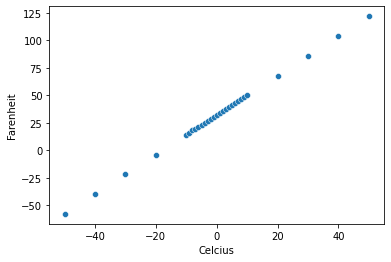

In [40]:
# importamos datos
temperature_df = pd.read_csv("./celcius_to_farenheit.csv")

# Visualizamos datos 
sns.scatterplot(x=temperature_df['Celcius'], y= temperature_df['Farenheit'])

Dividimos los datos para entrenar a la maquina

In [41]:
x_train = temperature_df['Celcius']
y_train = temperature_df['Farenheit'] #Fahrenheit

# Creamos el modelo de manera secuencial
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))
model.summary()

In [49]:
# Compilado
model.compile(optimizer=tf.keras.optimizers.Adam(1), loss='mean_squared_error')

# Entrenando el modelo 
epoch_hist = model.fit(x=x_train, y=y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 574ms/step - loss: 1.3279
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 397.2755
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 26.3803
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 84.8998
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 229.0293
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 174.6325
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 51.3086
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2794
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 46.6917
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 107.1913
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 106.8581
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 55.8029
Epoch 13/100
1/1 [======================

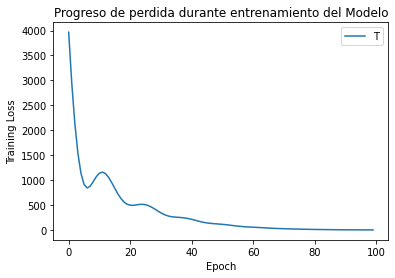

In [47]:
# Evaluando el modelo
epoch_hist.history.keys()

# Grafico 
plt.plot(epoch_hist.history['loss'])
plt.title("Progreso de perdida durante entrenamiento del Modelo")
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend('Training Loss')

In [50]:
model.get_weights()

# Predicciones
Temp_C = 0
Temp_F = model.predict([Temp_C])
Temp_F

1/1 [==============================] - 0s 153ms/step


array([[32.000404]], dtype=float32)